In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

In [2]:
data = pd.read_csv('data/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


# 1. Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617
std,0.3686,24.5595,30.0900
min,0.0000,0.0000,18.2500
25%,0.0000,9.0000,35.5000
50%,0.0000,29.0000,70.3500
75%,0.0000,55.0000,89.8500
max,1.0000,72.0000,118.7500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## `customerID`

In [5]:
data.customerID.nunique()

7043

The `customerID` is unique for each customers and will not be useful to our model.

## `Churn`: Target variable

In [6]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

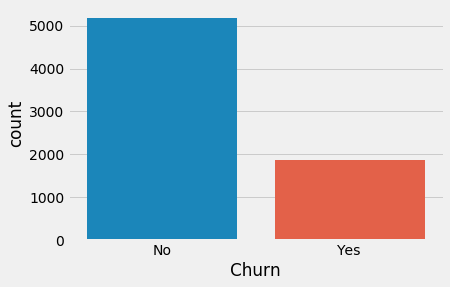

In [7]:
sns.countplot('Churn', data=data)

## `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`
- `gender`: Whether the customer is a male or a female
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)
- `Partner`: Whether the customer has a partner or not (Yes, No)
- `Dependents`: Whether the customer has dependents or not (Yes, No)
- `PhoneService`: Whether the customer has a ohone service or not (Yes, No)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)

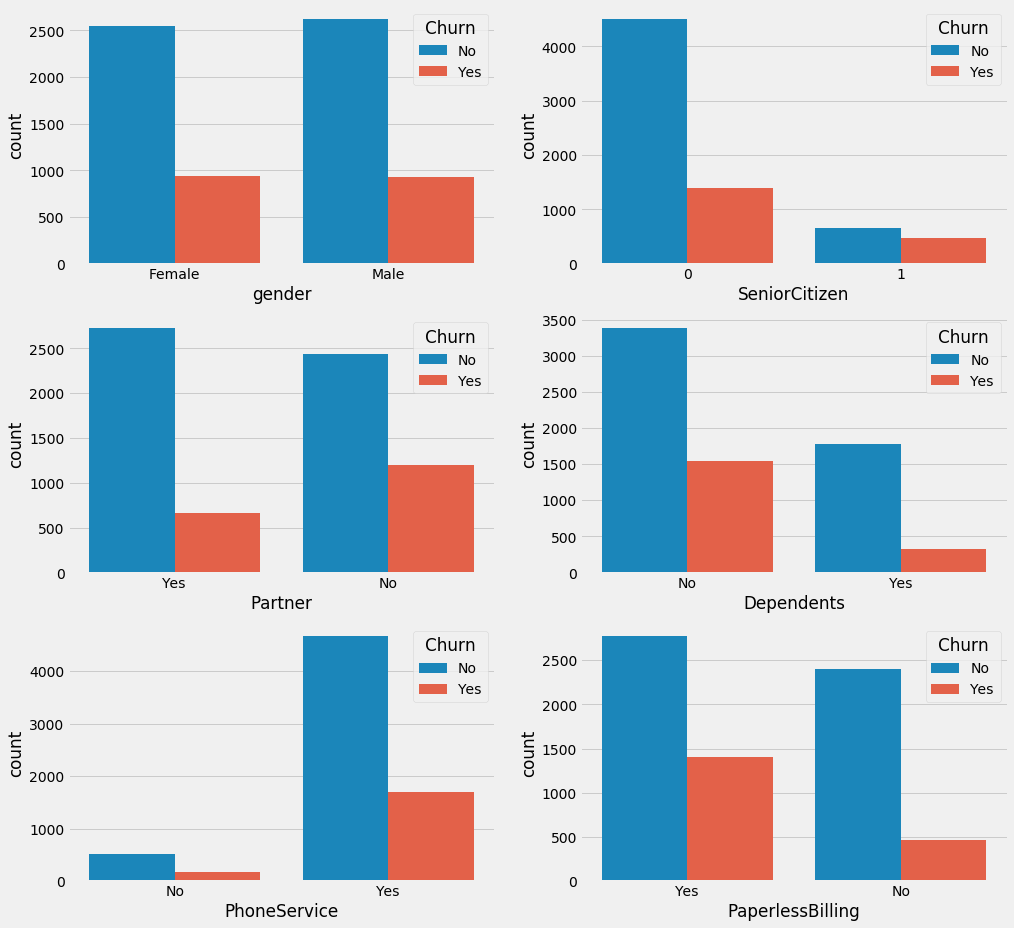

In [8]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('gender', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('SeniorCitizen', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('Partner', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('Dependents', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('PhoneService', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', data=data, hue='Churn')

It seems that the gender column doesn't have a big effect on the Chur rate. 
- Churn: 50.73% Males, 49.26% Females
- Not Churn: 50.24% Males, 49.75% Females

The senior citizen are more likely to churn

## `tenure`, `MonthlyCharges`, `TotalCharges`
- `tenure`: The number of months the customer has stayed with the company
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer

In [9]:
data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [10]:
data.tenure.max()

72

In [11]:
data['TotalCharges'] = data.TotalCharges.replace(' ', np.nan)
data['TotalCharges'] = data.TotalCharges.astype(float)

In [12]:
data.TotalCharges.dtype

dtype('float64')

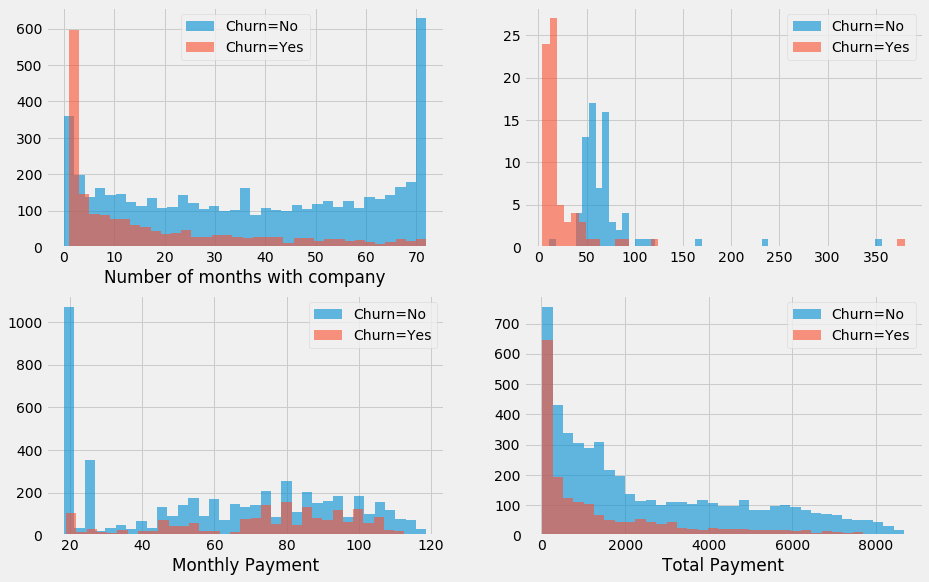

In [13]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.Churn == 'No'].tenure.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of months with company')

plt.subplot(3, 2, 2)
data[data.Churn == 'No'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=Yes')
plt.legend()

plt.subplot(3, 2, 3)
data[data.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Monthly Payment')
plt.legend()

plt.subplot(3, 2, 4)
data[data.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Total Payment')
plt.legend()

## `OnlineSecurity`, `OnlineBackup`, `InternetService`, `MultipleLines`, `DeviceProtection`, `TechSupport`

- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)
- `InternetService`: Customer's internet service provider (DSL, Fiber optic, No)
- `MultipleLines`: Whether the customer has Multiple Lines or not (Yes, No, No phone service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)

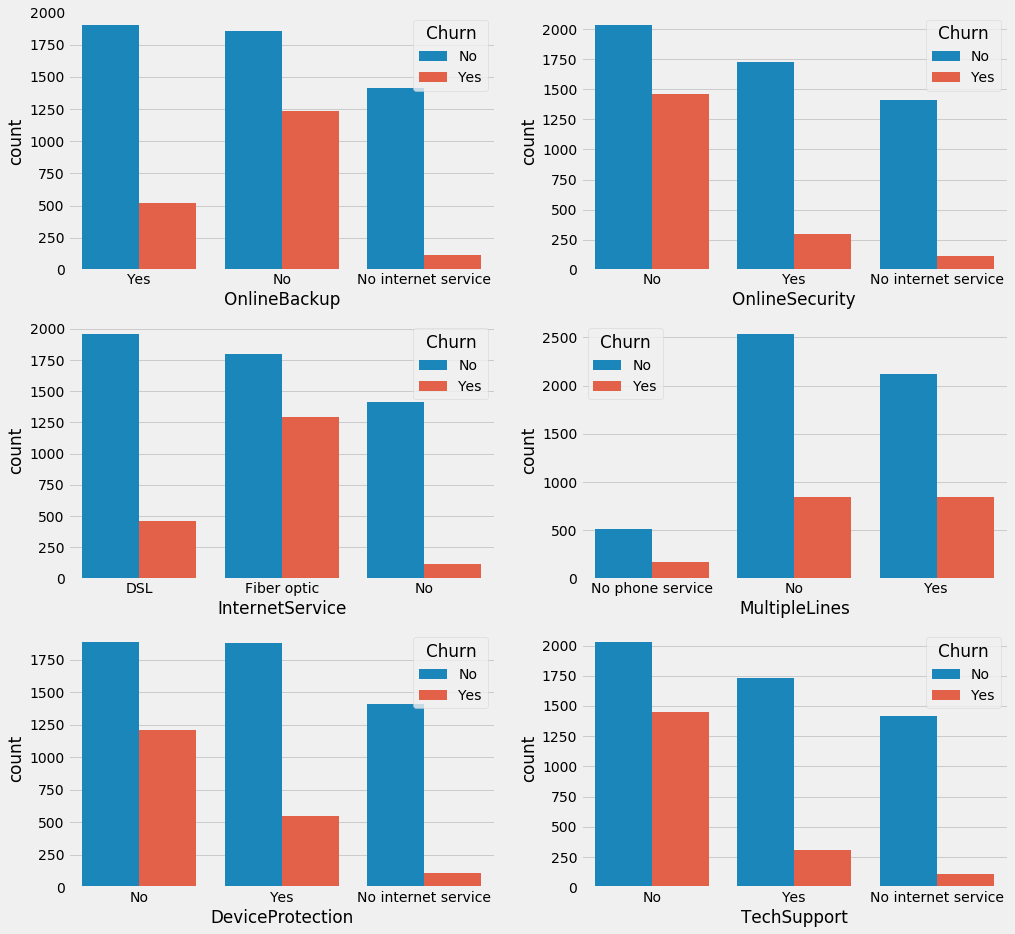

In [14]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('OnlineBackup', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('OnlineSecurity', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('InternetService', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('MultipleLines', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('DeviceProtection', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('TechSupport', data=data, hue='Churn')

## `StreamingMovies`, `StreamingTV`, `PaymentMethod`, `Contract`
- `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `PaymentMethod`: The customer's payment method (Electronic check, Mailed check, Bank Transfer (automatic), Credit card (automatic))
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)

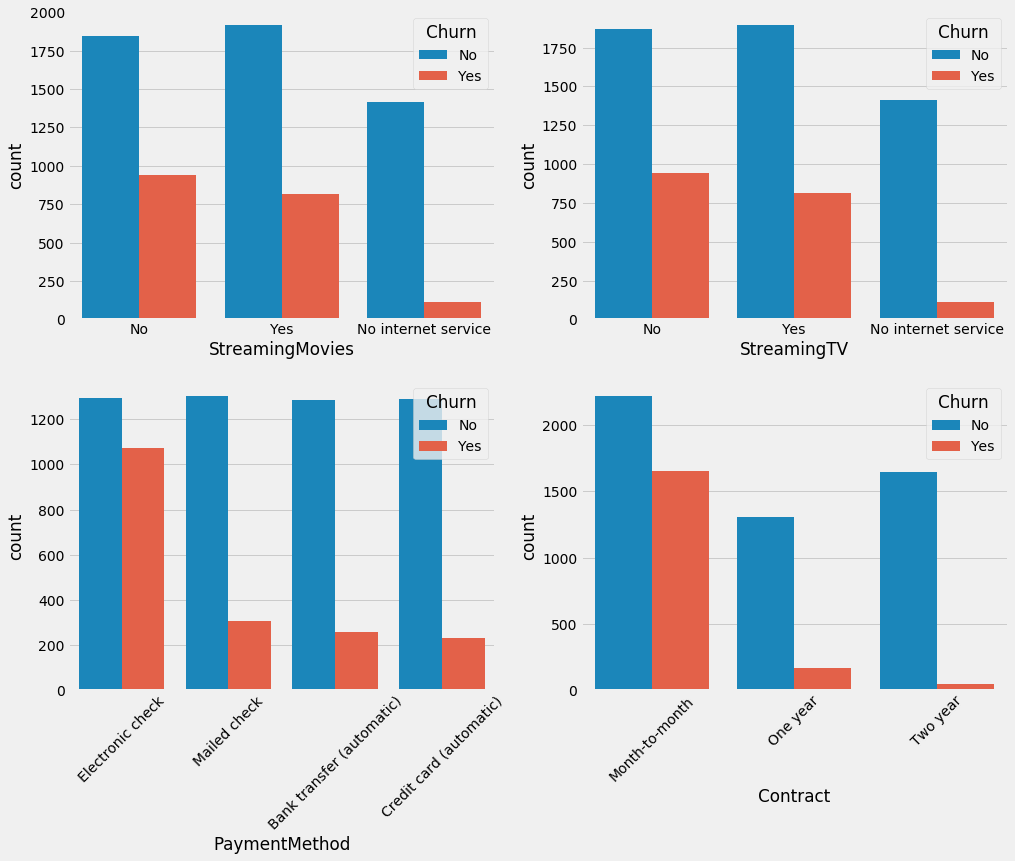

In [15]:
plt.figure(figsize=(15, 18))

plt.subplot(3, 2, 1)
sns.countplot('StreamingMovies', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('StreamingTV', data=data, hue='Churn')

plt.subplot(3, 2, 3)
g = sns.countplot('PaymentMethod', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(3, 2, 4)
g = sns.countplot('Contract', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

# 2. Feature Engineering

## Missing Values

In [16]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
data['TotalCharges'] = data.TotalCharges.fillna(value=data.TotalCharges.median())

In [18]:
data.TotalCharges.median()

1397.475

## `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`

In [19]:
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns:
    data[column] = data[column].replace({'No internet service':'No'})

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes


## Binary Columns

In [21]:
binary_columns = [column for column in data.columns if data[column].nunique() == 2]
len(binary_columns)

13

In [22]:
columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',  
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'Churn']
for col in columns:
    data[col] = data[col].map({'Yes':1, 'No':0})
    
data['gender'] = data.gender.map({'Male':1, 'Female':0})

In [23]:
for col in binary_columns:
    print(data[col].unique())

[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


## `customerID`
we are going to drop the customers ID

In [24]:
customerID = data.customerID
data.drop('customerID', axis=1, inplace=True)

## `tenure`

In [25]:
def tenure_lab(period) :
    
    if period <= 12 :
        return 1
    elif (period > 12) & (period <= 24 ):
        return 2
    elif (period > 24) & (period <= 36) :
        return 3
    elif (period > 36) & (period <= 48) :
        return 3
    elif (period > 48) & (period <= 60) :
        return 4
    elif period > 60 :
        return 5
    
data['tenure'] = data.tenure.apply(tenure_lab)

In [26]:
data.tenure.value_counts()

1    2186
3    1594
5    1407
2    1024
4     832
Name: tenure, dtype: int64

## `MultipleLines`, `InternetService`, `Contract`, `PaymentMethod`
We are going to transfer these columns into dummy variables

In [27]:
dummy_col = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure']
data_1 = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')

In [28]:
data_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_2,tenure_3,tenure_4,tenure_5
0,0,0,1,0,0,0,1,0,0,0,0,1,29.8500,29.8500,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,1,0,1,0,0,0,0,56.9500,1889.5000,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,1,53.8500,108.1500,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,1,1,0,0,0,42.3000,1840.7500,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,70.7000,151.6500,1,0,0,1,0,0,0,0,1,0,0,0,0,0


## Correlation Analysis

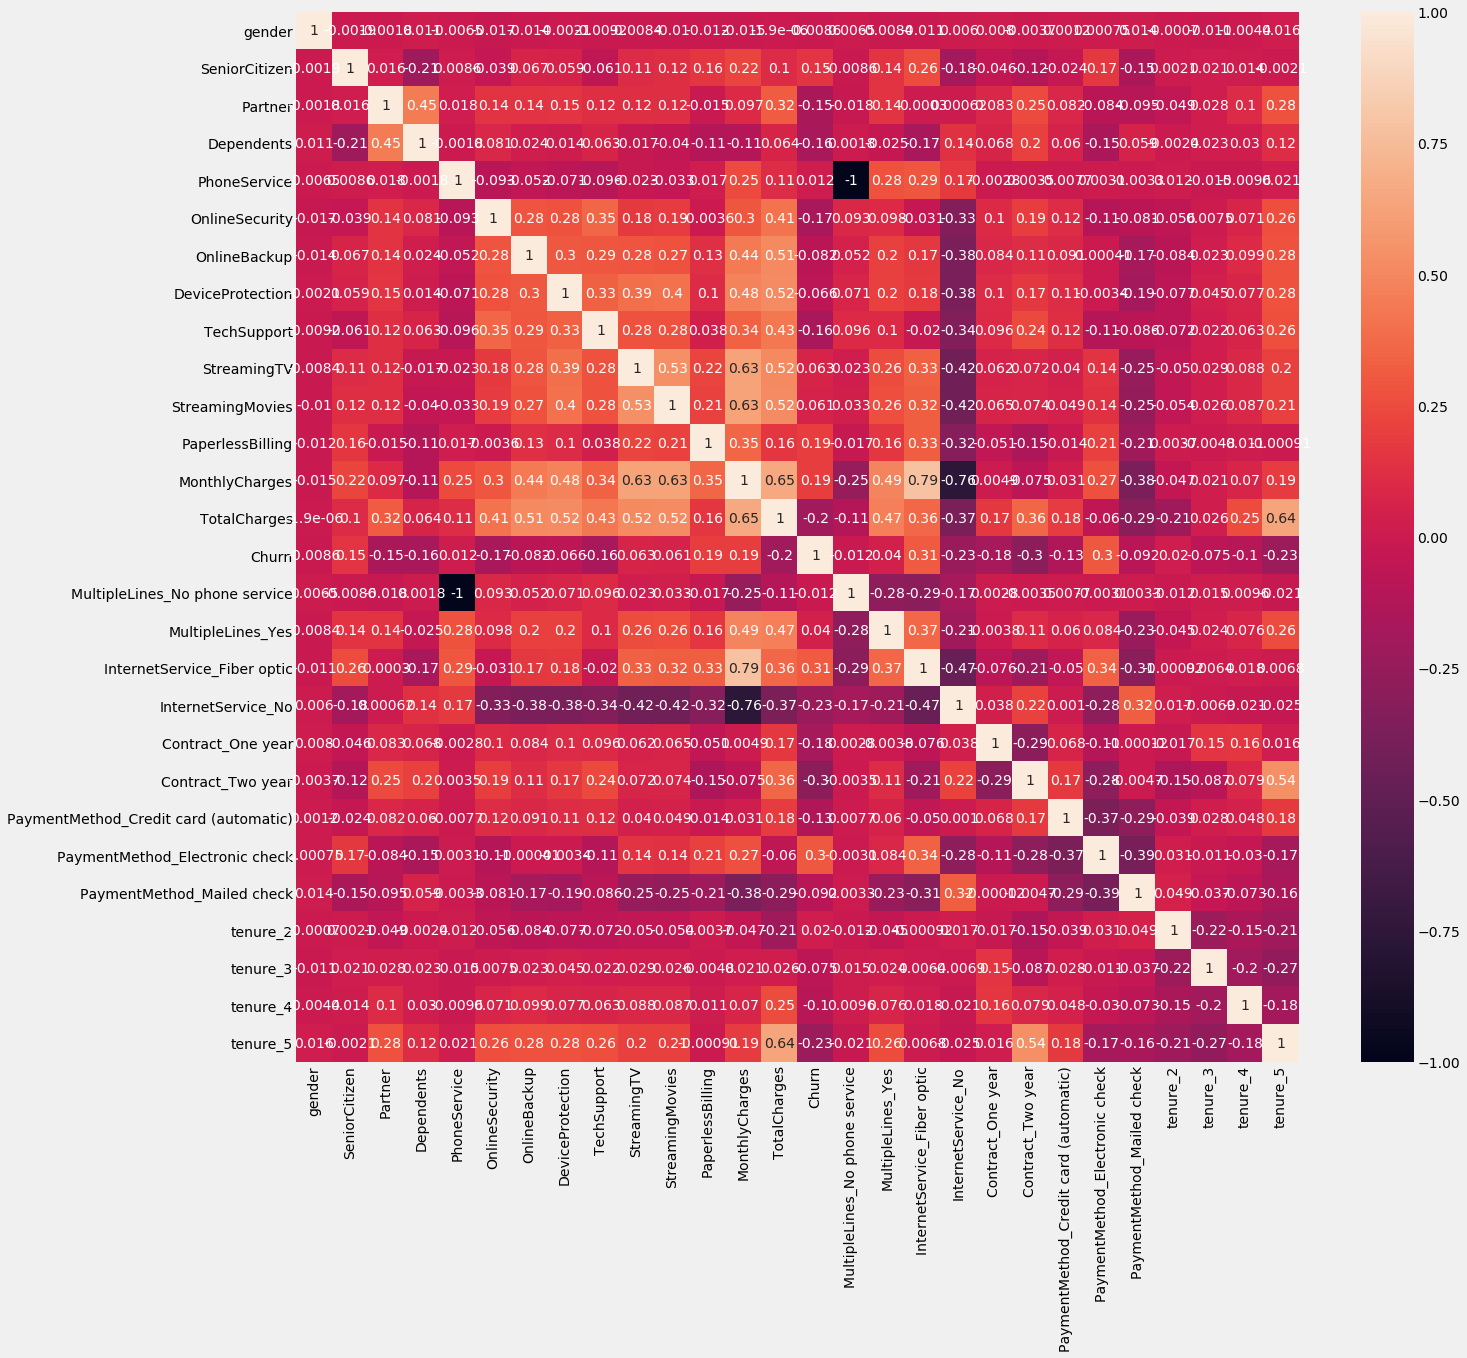

In [29]:
plt.figure(figsize=(20, 18))
sns.heatmap(data_1.corr(), annot=True)

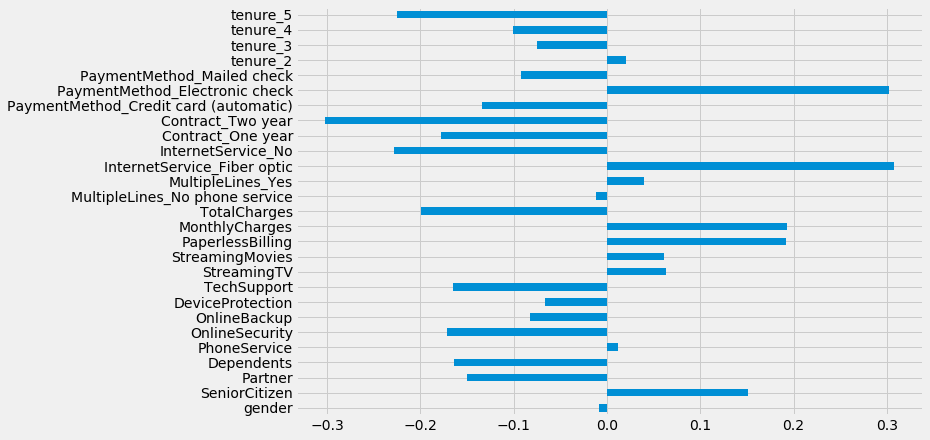

In [30]:
data_1.drop('Churn', axis=1).corrwith(data.Churn).plot(kind='barh', figsize=(10, 7))

## Checking for duplicate rows and columns

In [31]:
print(data_1.shape)

# Remove duplicate Features
data_1 = data_1.T.drop_duplicates()
data_1 = data_1.T

# Remove Duplicate Rows
data_1.drop_duplicates(inplace=True)

print(data_1.shape)

(7043, 28)
(7021, 28)


In [32]:
data_1.to_csv('data/clean_data.csv', index=False)